<a href="https://colab.research.google.com/github/gvignati/ComputationalDesign/blob/main/test_Isoline_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
import pandas as pd
import numpy as np

uploaded = files.upload()

#data_url = 'https://raw.githubusercontent.com/alexmill/website_notebooks/master/data/data_3d_contour.csv'
data_url = 'data_3d_contour.csv'

contour_data = pd.read_csv(data_url)
contour_data.head()

MessageError: ignored

In [3]:
import numpy as np

Z = contour_data.pivot_table(index='x', columns='y', values='z').T.values

X_unique = np.sort(contour_data.x.unique())
Y_unique = np.sort(contour_data.y.unique())
X, Y = np.meshgrid(X_unique, Y_unique)
pd.DataFrame(Z).round(3)

,0,1,2,3,4,5,6
0,0.392,0.496,0.500,0.500,0.500,0.500,0.500
1,0.286,0.472,0.494,0.500,0.500,0.500,0.500
2,0.094,0.304,0.434,0.496,0.500,0.500,0.500
3,-0.036,0.118,0.308,0.460,0.500,0.500,0.500
4,-0.052,-0.042,0.120,0.328,0.480,0.500,0.500
5,-0.212,-0.192,-0.120,0.004,0.266,0.438,0.496
6,-0.320,-0.362,-0.348,-0.352,-0.304,-0.247,-0.145
7,-0.328,-0.414,-0.454,-0.460,-0.478,-0.474,-0.490


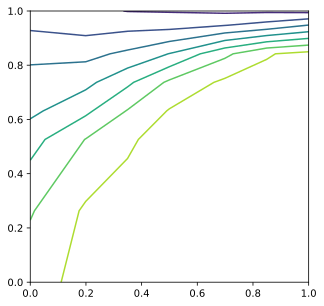

In [4]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

import matplotlib.pyplot as plt
from matplotlib import rcParams


# Initialize plot objects
rcParams['figure.figsize'] = 5, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Generate a contour plot
cp = ax.contour(X, Y, Z)

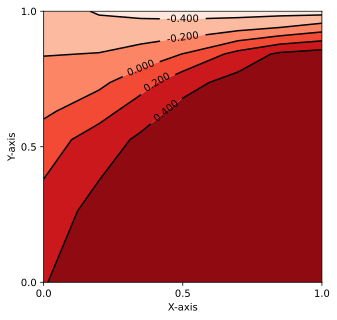

In [5]:
# Initialize plot objects
rcParams['figure.figsize'] = 5, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Define levels in z-axis where we want lines to appear
levels = np.array([-0.4,-0.2,0,0.2,0.4])

# Generate a color mapping of the levels we've specified
import matplotlib.cm as cm # matplotlib's color map library
cpf = ax.contourf(X,Y,Z, len(levels), cmap=cm.Reds)

# Set all level lines to black
line_colors = ['black' for l in cpf.levels]

# Make plot and customize axes
cp = ax.contour(X, Y, Z, levels=levels, colors=line_colors)
ax.clabel(cp, fontsize=10, colors=line_colors)
plt.xticks([0,0.5,1])
plt.yticks([0,0.5,1])
ax.set_xlabel('X-axis')
_ = ax.set_ylabel('Y-axis')
plt.savefig('figure.pdf') # uncomment to save vector/high-res version